<a href="https://colab.research.google.com/github/bc2026/DenoisingSIAIML/blob/main/denosing_ml_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
!pip install opencv-python
import cv2
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.9 MB/s eta 0:00:00


In [ ]:
img = Image.open("/content/drive/MyDrive/Streams/Cell1_S1.tif")

path_to_csv = '/content/drive/MyDrive/Streams/ParticleLocalization/p1c1s1_11/p1c1s1_11.csv'

In [ ]:
# Read all frames and convert to grayscale
frames = []
for i in range(img.n_frames):
    img.seek(i)  # Move to frame i
    gray_frame = img.convert("L")  # Convert to grayscale
    frames.append(np.array(gray_frame))

In [ ]:
# Normalize by 255
frames = np.divide(frames, 255.0)

In [ ]:
frames[0] # Access first image
frames[0][0] # Access first row of first image
frames[0][0][0] # Access first pixel

np.float64(1.0)

In [ ]:
from sklearn.model_selection import train_test_split
start_X, start_Y = 439, 280

In [ ]:
coordinates = pd.read_csv(path_to_csv)
coordinates = coordinates / 1023
coordinates

,centroidGlobalColX,centroidGlobalRowY
0,0.431085,0.275660
1,0.431085,0.275660
2,0.431085,0.275660
3,0.431085,0.275660
4,0.431085,0.280547
...,...,...
296,0.434018,0.286413
297,0.435973,0.286413
298,0.434018,0.290323
299,0.434018,0.290323


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(frames, coordinates, test_size=0.1, random_state=1)

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Assuming your input is a sequence of image frames
# And your output is the (x, y) coordinates of the particle
from sklearn.model_selection import train_test_split

input_shape = (1024, 1024, 1)  # Example: 64x64 grayscale images

# For an MLP approach
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D((2, 2)),                     # Added layer
    Flatten(),
    Dense(128, activation='relu'),          # Increased neurons
    Dense(2)  # Output (x, y) coordinates
])

# Compile with appropriate loss for regression
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error as a readable metric
)


# Train the model
X_train, X_test, y_train, y_test = train_test_split(frames, coordinates, test_size=0.1, random_state=1)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop if val_loss doesn't improve for 3 epochs

model.fit(X_train, coordinates, epochs=5, batch_size=16,
          validation_split=0.1)

# predictions = model.predict(frames) * 1023.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 518s 32s/step - loss: 1755.4022 - mae: 17.6211 - val_loss: 0.9445 - val_mae: 0.7659
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 507s 32s/step - loss: 0.3700 - mae: 0.4315 - val_loss: 0.0584 - val_mae: 0.2252
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 511s 32s/step - loss: 0.0522 - mae: 0.1984 - val_loss: 0.0116 - val_mae: 0.1078
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 512s 32s/step - loss: 0.0122 - mae: 0.0963 - val_loss: 0.0040 - val_mae: 0.0540
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 512s 32s/step - loss: 0.0024 - mae: 0.0425 - val_loss: 8.3133e-04 - val_mae: 0.0211


In [ ]:
model.save('particle_tracker_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


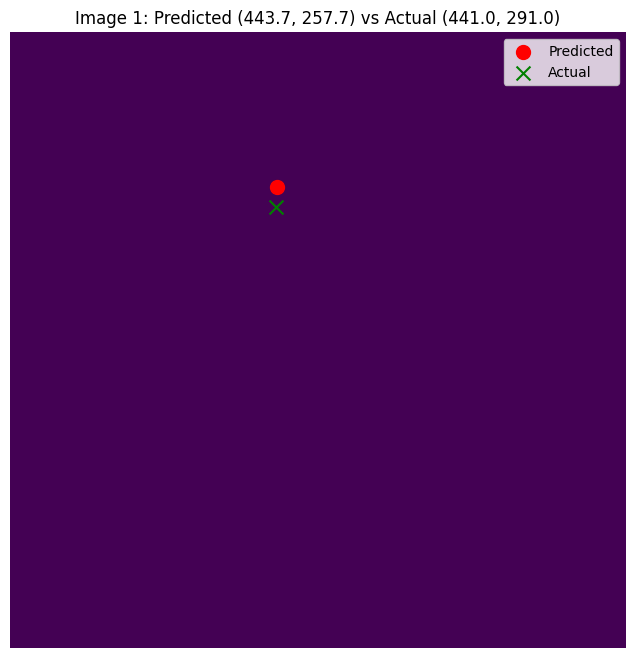

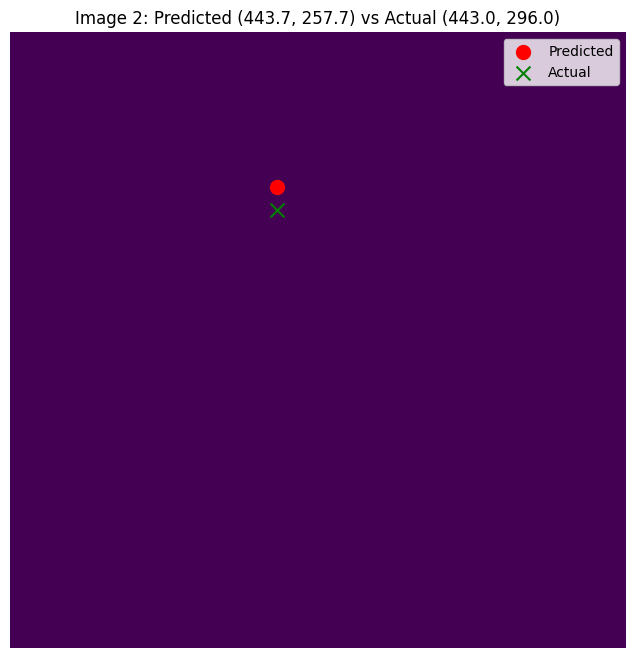

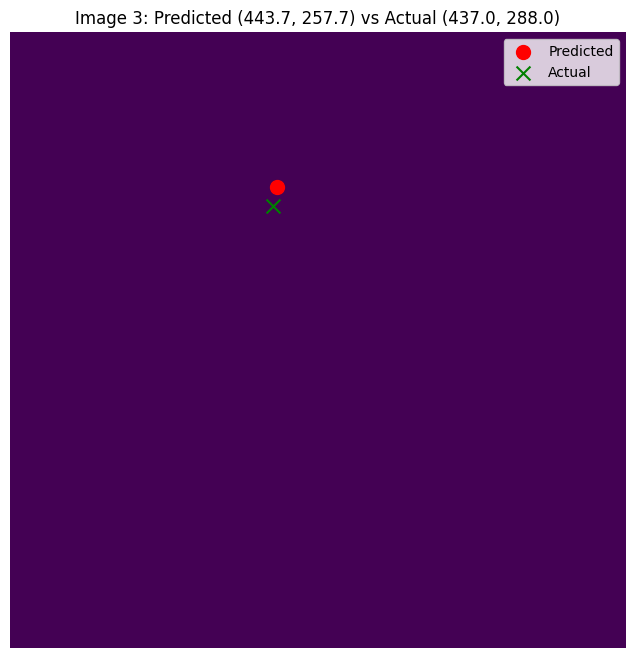

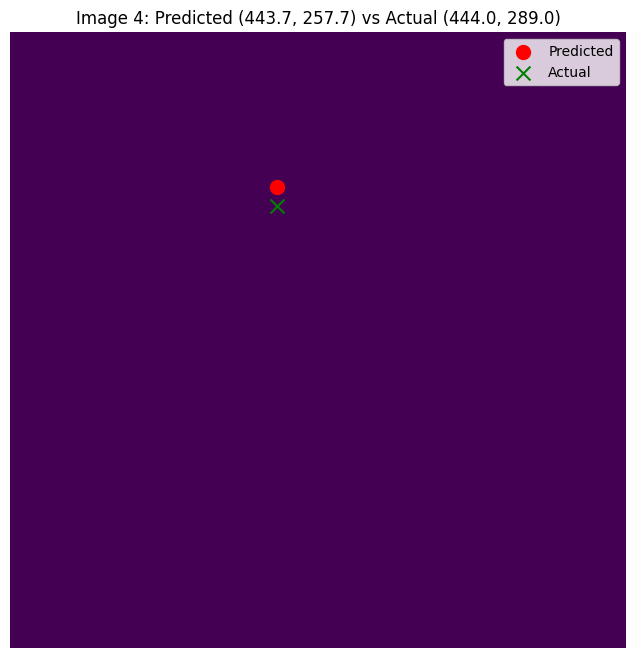

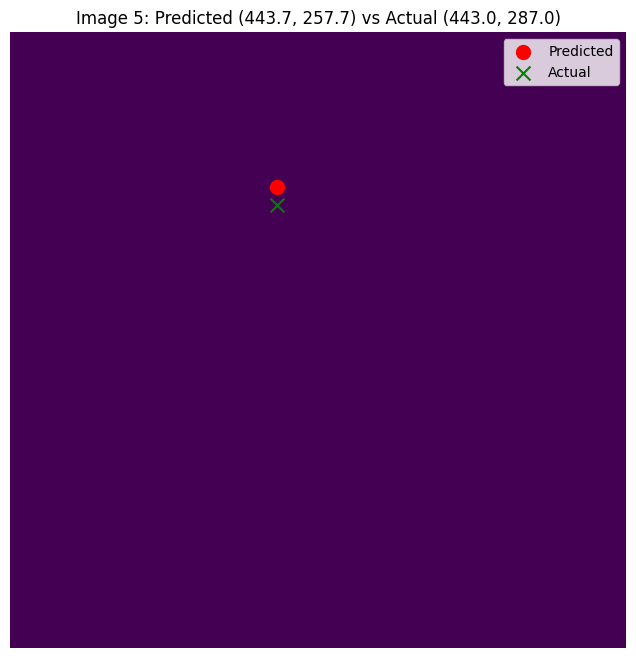

In [ ]:
# model = load_model("/content/particle_tracker_model.keras")
# Predict coordinates (normalized, then scaled back to pixels)

predictions = model.predict(X_test) * 1023.0
y_test_pixels = y_test  # Assuming y_test is already in pixels; if not, multiply by 1023.0
x_coords, y_coords = y_test_pixels["centroidGlobalColX"], y_test_pixels["centroidGlobalRowY"]

x_coords = x_coords * 1023.0
y_coords = y_coords * 1023.0

# Visualize predictions vs. ground truth
for i in range(min(5, len(X_test))):  # Show up to 5 examples
    plt.figure(figsize=(8, 8))
    plt.imshow(X_test[i, :, :])  # Display grayscale image

    # Plot predicted coordinates (red dot)
    pred_x, pred_y = predictions[i]
    plt.scatter(pred_x, pred_y, c='red', s=100, label='Predicted', marker='o')

    # Plot actual coordinates (green dot)
    true_x, true_y = x_coords.iloc[i], y_coords.iloc[i]
    plt.scatter(true_x, true_y, c='green', s=100, label='Actual', marker='x')

    plt.title(f"Image {i+1}: Predicted ({pred_x:.1f}, {pred_y:.1f}) vs Actual ({true_x:.1f}, {true_y:.1f})")
    plt.legend()
    plt.axis('off')  # Hide axes for cleaner look
    plt.show()